Customer credit in finance department dataset :

Context :

Customer credit information within a finance department often pertains to data related to customers' financial health, creditworthiness, and their interactions with credit products.

Problem Stement :

Bulid the predictive model to predict Default_On_Payment


Data Dictionary :

Customer_ID: Unique identifier for each customer

Status_Checking_Acc: Status of the customer's checking account (e.g., 'A11' - no negative status, 'A12' - < 200 DM, 'A13' - >= 200 DM, 'A14' - no account)

Duration_in_Months: Duration of the credit in months

Credit_History: Credit history of the customer (e.g., 'A30' - no credits taken, 'A31' - all credits paid back duly, 'A32' - existing credits paid back duly till now, 'A33' - delay in paying off in the past, 'A34' - critical account)

Purpose_Credit_Taken: Purpose for which the credit was taken

Credit_Amount: Amount of credit in currency

Savings_Acc: Savings account status of the customer

Years_At_Present_Employment: Years at present employment

Inst_Rt_Income: Installment rate as a percentage of income

Marital_Status_Gender: Marital status and gender of the customer

Age: Age of the customer

Other_Inst_Plans: Other installment plans the customer might have

Housing: Housing situation of the customer

Num_CC: Number of existing credits at this bank

Job: Job status of the customer

Dependents: Number of dependents

Telephone: Whether the customer has a telephone

Foreign_Worker: Whether the customer is a foreign worker

Default_On_Payment: Target variable - Whether the customer defaulted on payment (1 - Yes, 0 - No)

---



Logistic Regression

Logistic ragression is a data analysis technique that uses mathematics to find to the relationships between two data factor

Lets start coding!

In [ ]:
# get access your google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/Imarticus/Stats

/gdrive/MyDrive/Imarticus/Stats


In [ ]:
#  imports essential libraries for data manipulation (NumPy, Pandas), visualization (Matplotlib, Seaborn), and configures Matplotlib for inline plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
 # Load your InsuranceLosses  dataset
df=pd.read_csv("default_on_payment.csv")

In [ ]:
# Let us make another copy of data
df = data.copy()
df.head()

Basic function used to understand the data set

In [ ]:
df.head() # Display first five rows of dataframe

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [ ]:
df.tail() # Display last five rows of tne dataframe

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
4995,104996,A14,12,A32,A42,1736,A61,A74,3,A92,...,31,A143,A152,1,A172,1,A191,A201,0,1
4996,104997,A11,30,A32,A41,3857,A61,A73,4,A91,...,40,A143,A152,1,A174,1,A192,A201,0,1
4997,104998,A14,12,A32,A43,804,A61,A75,4,A93,...,38,A143,A152,1,A173,1,A191,A201,0,1
4998,104999,A11,45,A32,A43,1845,A61,A73,4,A93,...,23,A143,A153,1,A173,1,A192,A201,1,1
4999,105000,A12,45,A34,A41,4576,A62,A71,3,A93,...,27,A143,A152,1,A173,1,A191,A201,0,1


In [ ]:
df.shape #

(5000, 23)

In [ ]:
df.size # Display size of dataframe

115000

In [ ]:
df.info() # Display info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [ ]:
df.isnull().sum().sum() # Display the sum of null values

0

Observation We can see that there are no null values in this data set

Checking the unique values

In [ ]:
# Check the unique values in each column of the dataframe.
df.nunique()


Statistical Summary

In [ ]:
df.describe(include='all') # Describe the info about dataset

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
count,5000.000000,5000,5000.000000,5000,5000,5000.000000,5000,5000,5000.000000,5000,...,5000.000000,5000,5000,5000.000000,5000,5000.000000,5000,5000,5000.000000,5000.0
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,...,NaN,3,3,NaN,4,NaN,2,2,NaN,NaN
top,NaN,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,...,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN,NaN
freq,NaN,1970,NaN,2650,1400,NaN,3015,1695,NaN,2740,...,NaN,4070,3565,NaN,3150,NaN,2980,4815,NaN,NaN
mean,102500.500000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,...,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,0.299000,1.0
std,1443.520003,NaN,12.053989,NaN,NaN,2821.607329,NaN,NaN,1.118267,NaN,...,11.370917,NaN,NaN,0.577423,NaN,0.361941,NaN,NaN,0.457866,0.0
min,100001.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,...,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,1.0
25%,101250.750000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,...,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,1.0
50%,102500.500000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,...,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,1.0
75%,103750.250000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,...,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,1.000000,1.0



Exploratory Data Analysis :

Box plot

They show the median, upper and lower quartiles as well as they show the outliers

Text(0, 0.5, 'Values')

<Figure size 800x600 with 0 Axes>

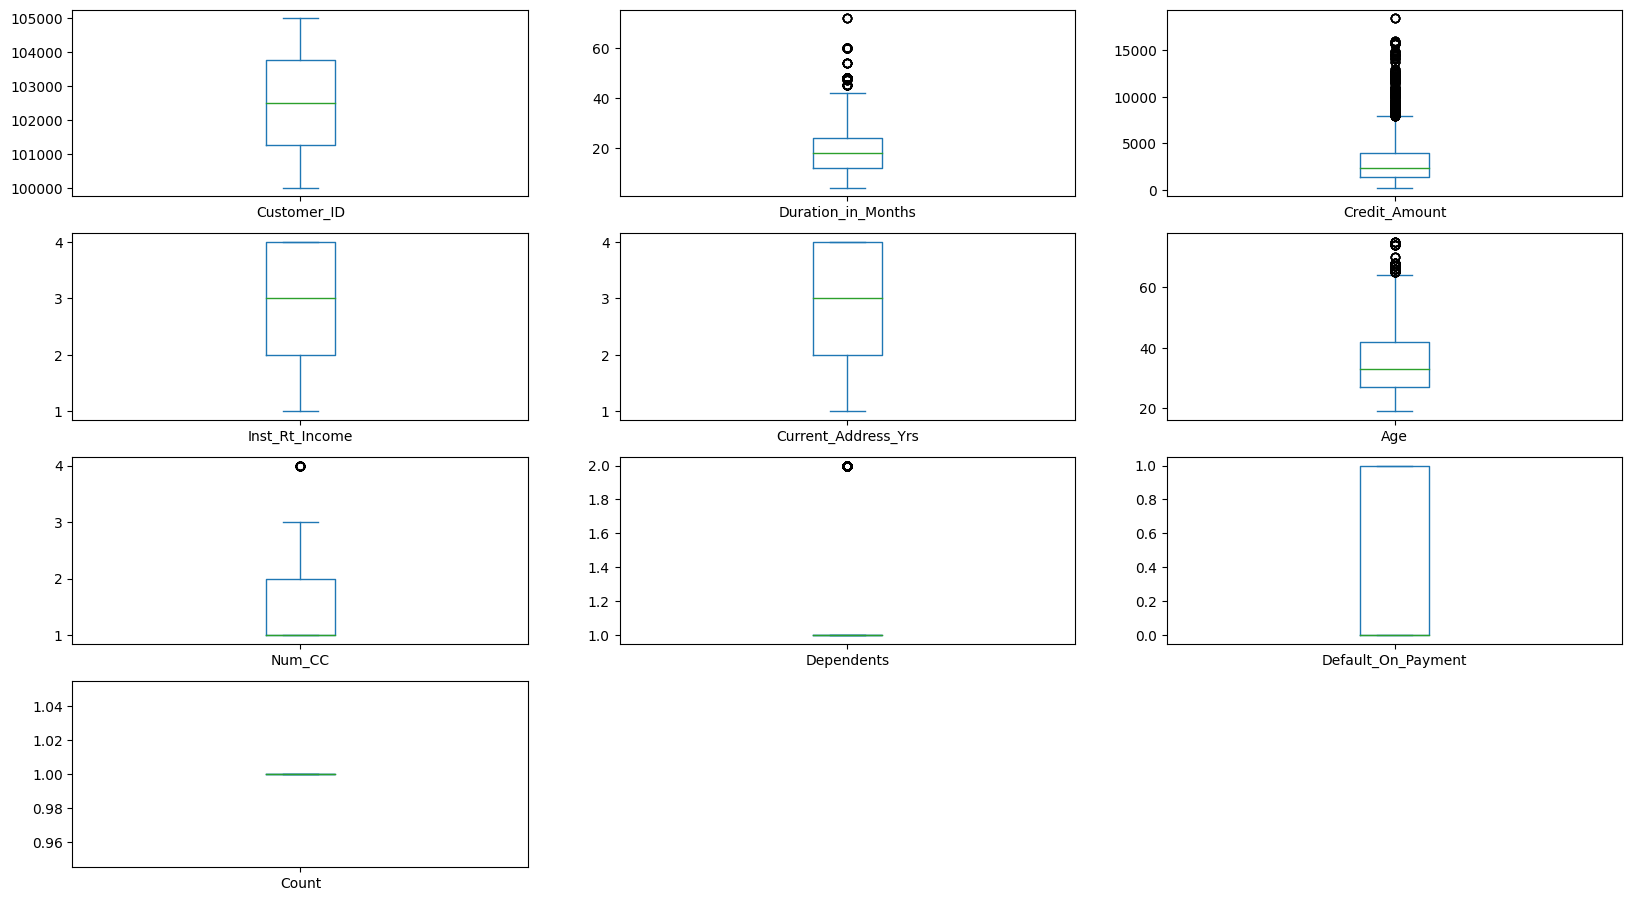

In [ ]:
# Melt the DataFrame to create boxplots for each column
melted_df = df.melt()

# Create multiple boxplots using Seaborn
plt.figure(figsize=(8, 6))
# Using Pandas to create multiple boxplots
boxplot = df.plot(kind='box',subplots=True, layout=(69,3), sharex=False, sharey=False, figsize=(20,200))
plt.xlabel('Columns')
plt.ylabel('Values')

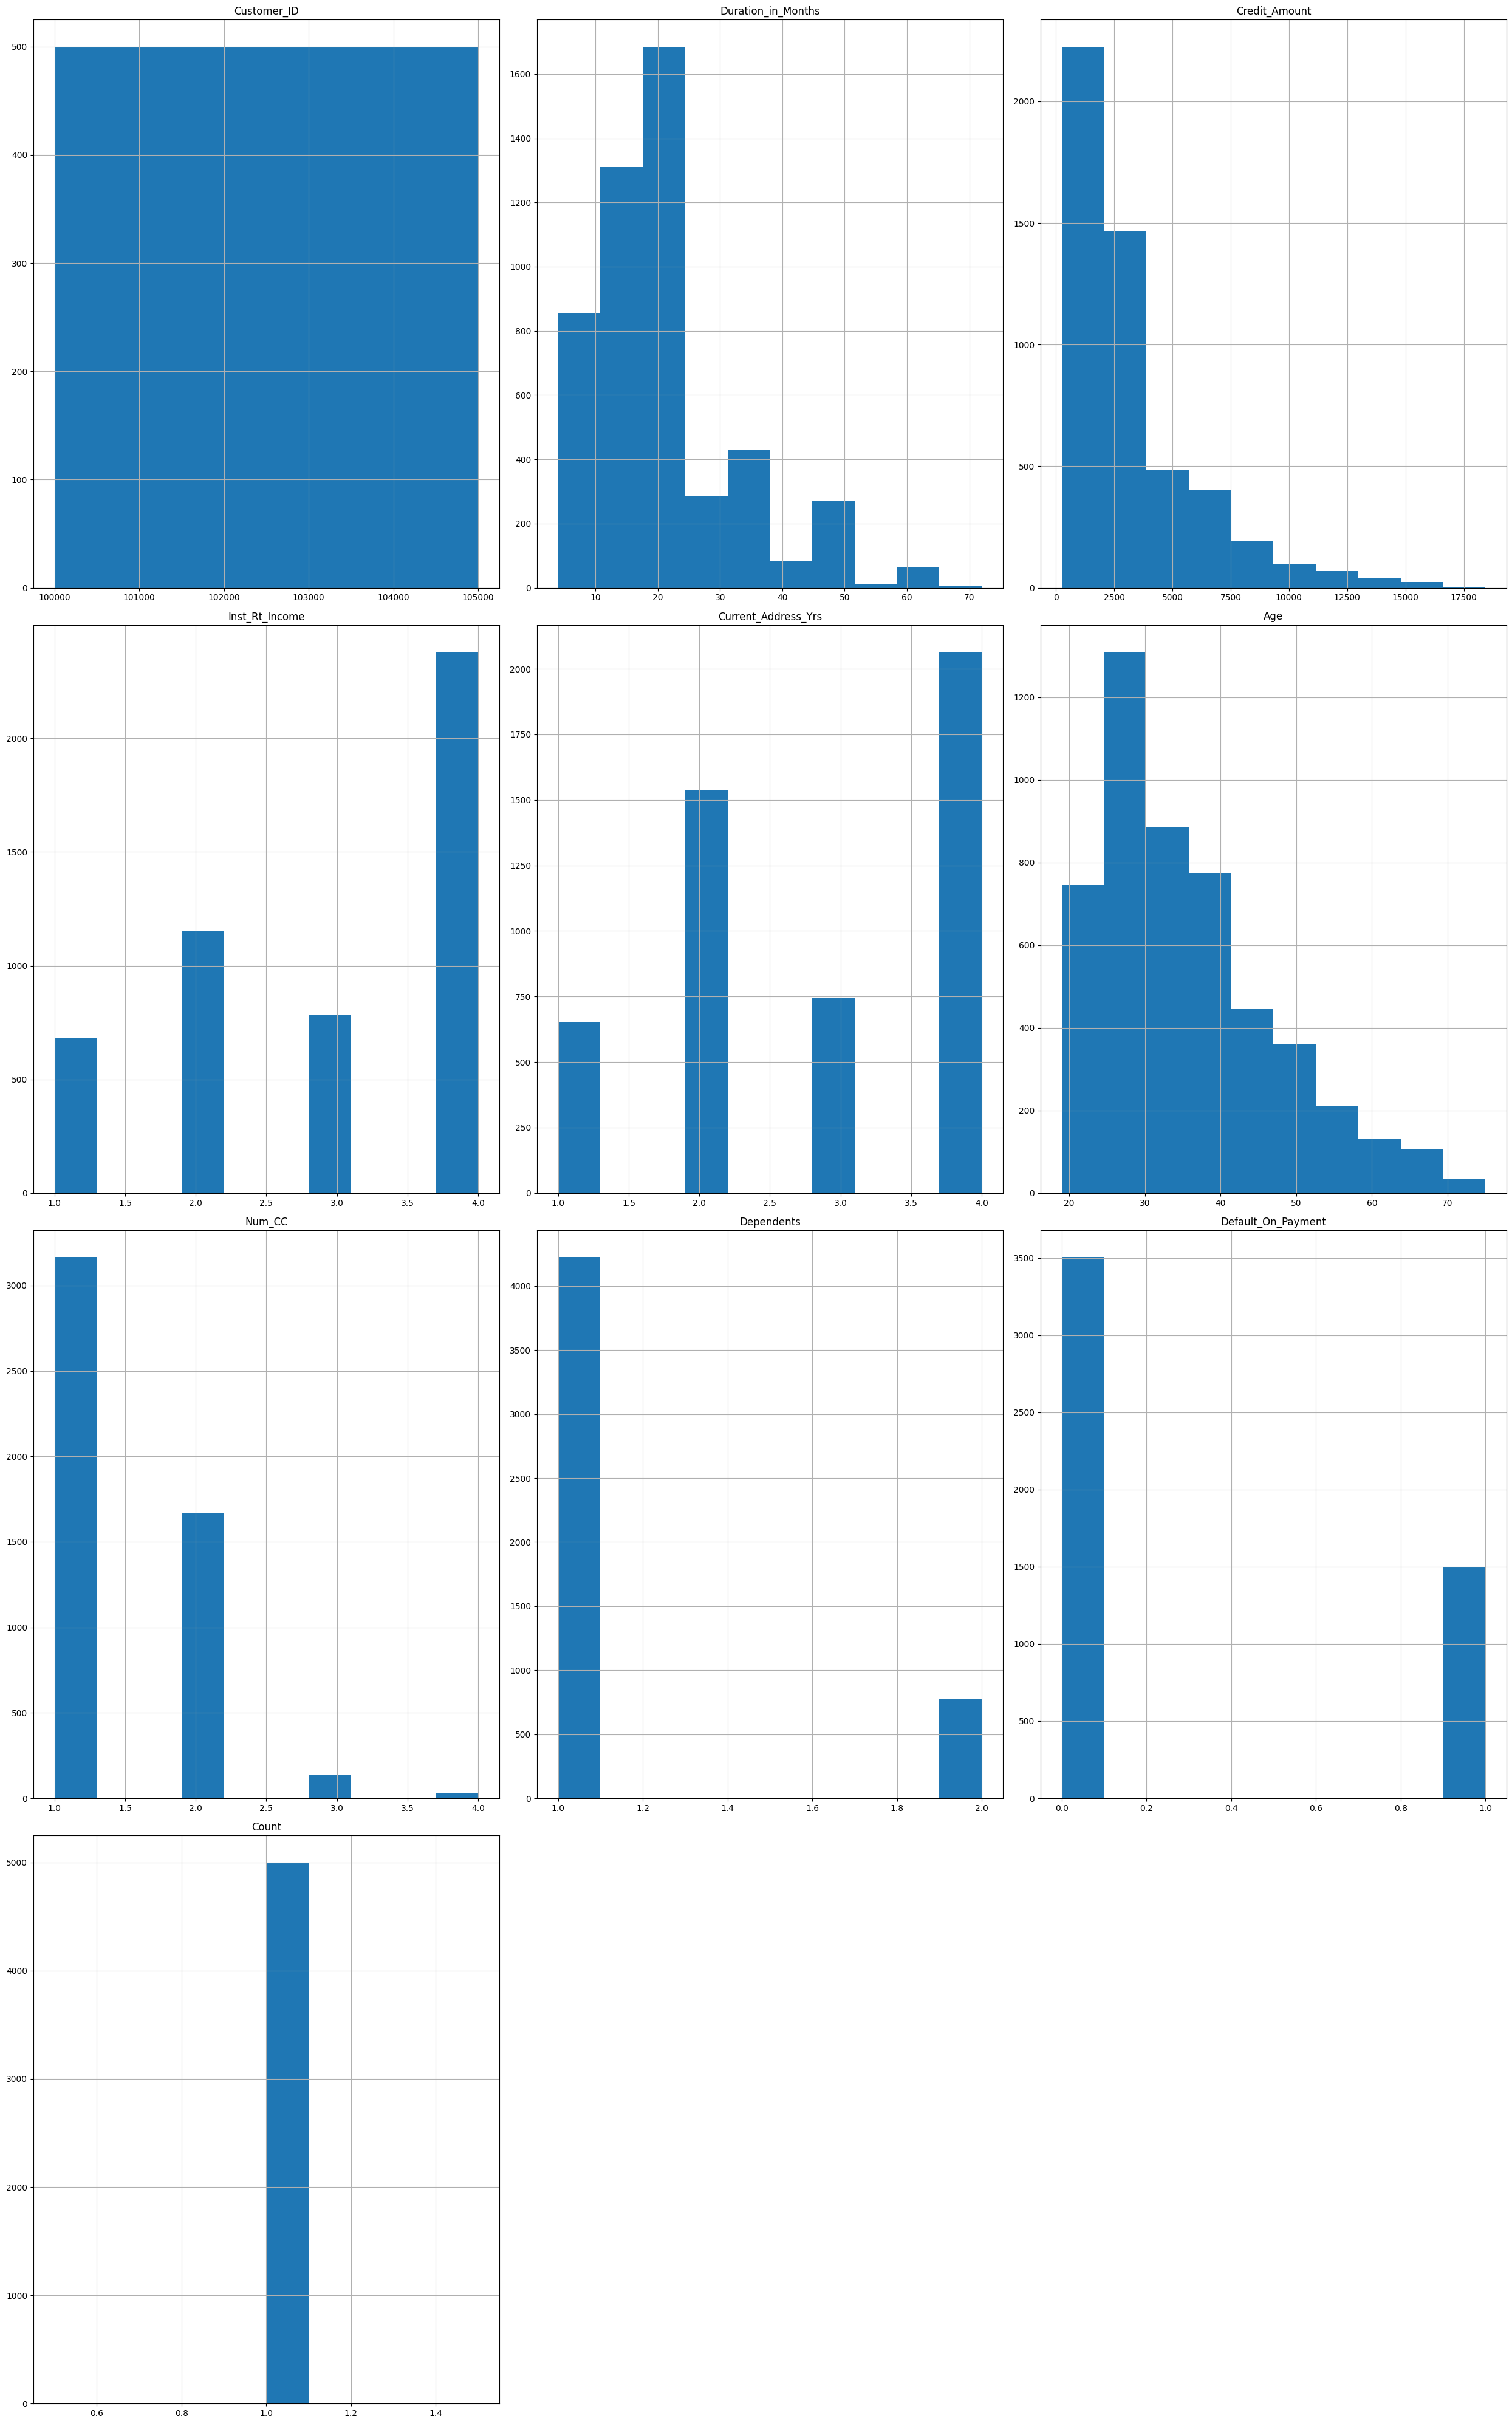

In [ ]:
# plot histogram for all columns
df.hist(figsize=(25,40)) # Adjust figsize as needed
plt.tight_layout() # Adjusts subplots to fit into the figure area
plt.show()

In [ ]:
# Count column is a zero variance column
df=df.drop(['Customer_ID','Count','Telephone'],axis=1)

In [ ]:
df

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,0
4996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,0
4997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,0
4998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Status_Checking_Acc          5000 non-null   object
 1   Duration_in_Months           5000 non-null   int64 
 2   Credit_History               5000 non-null   object
 3   Purposre_Credit_Taken        5000 non-null   object
 4   Credit_Amount                5000 non-null   int64 
 5   Savings_Acc                  5000 non-null   object
 6   Years_At_Present_Employment  5000 non-null   object
 7   Inst_Rt_Income               5000 non-null   int64 
 8   Marital_Status_Gender        5000 non-null   object
 9   Other_Debtors_Guarantors     5000 non-null   object
 10  Current_Address_Yrs          5000 non-null   int64 
 11  Property                     5000 non-null   object
 12  Age                          5000 non-null   int64 
 13  Other_Inst_Plans             5000

Converting Object columns in Numeric Categorical data

In [ ]:
X = df.drop(['Default_On_Payment'],axis=1)
y = df[['Default_On_Payment']]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Status_Checking_Acc          5000 non-null   object
 1   Duration_in_Months           5000 non-null   int64 
 2   Credit_History               5000 non-null   object
 3   Purposre_Credit_Taken        5000 non-null   object
 4   Credit_Amount                5000 non-null   int64 
 5   Savings_Acc                  5000 non-null   object
 6   Years_At_Present_Employment  5000 non-null   object
 7   Inst_Rt_Income               5000 non-null   int64 
 8   Marital_Status_Gender        5000 non-null   object
 9   Other_Debtors_Guarantors     5000 non-null   object
 10  Current_Address_Yrs          5000 non-null   int64 
 11  Property                     5000 non-null   object
 12  Age                          5000 non-null   int64 
 13  Other_Inst_Plans             5000

Creating dummies for object columns

Categorical value cannot be read so we have to convert them in the numeric form so the algorithm can process the data properly

dummy variable convert categorical data and can tack the values as 0 or 1

In [ ]:
X = pd.get_dummies(X,columns=['Status_Checking_Acc','Credit_History','Purposre_Credit_Taken','Savings_Acc','Years_At_Present_Employment','Marital_Status_Gender','Other_Debtors_Guarantors','Other_Inst_Plans ','Property','Housing','Job','Telephone','Foreign_Worker'],drop_first=True)

Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [ ]:
print('Size of X_train: ',X_train.shape)
print('Size of X_test: ',X_test.shape)
print('Size of y_train: ',y_train.shape)
print('Size of y_test: ',y_test.shape)

Size of X_train:  (3500, 48)
Size of X_test:  (1500, 48)
Size of y_train:  (3500, 1)
Size of y_test:  (1500, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,roc_auc_score,roc_curve,f1_score,precision_score # use to check  model  performance
# lonreg=LogisticRegression()

Use confusion matrix beacuse it showing counts of true positive, True negative, false positive  and false negative predictions

In [ ]:
def make_confusion_matrix(y_actual, y_predict, labels=[1, 0]):
    """
    y_predict: prediction of class
    y_actual: ground truth
    """

    cm = confusion_matrix(y_actual, y_predict, labels=labels)

    df_cm = pd.DataFrame(cm, index=["Payment Defaulter", "Not Defaulter"],
                         columns=["Payment Defaulter", "Not Defaulter"])

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues")
    plt.ylabel("True label")
    plt.xlabel("Predicted labels")
    plt.show()

# Example usage:
# make_confusion_matrix(y_true, y_pred)

Using sklearn to make model

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicting on the train set with default cutoff to be 0.5

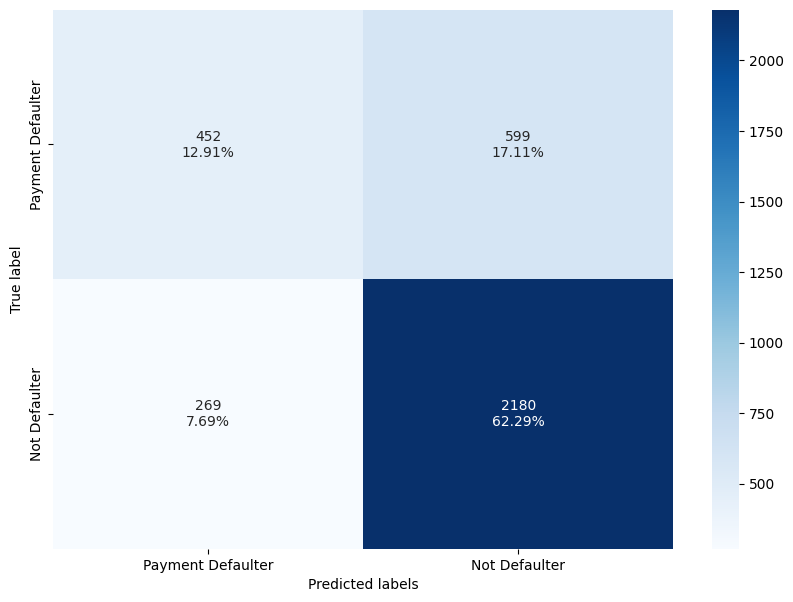

In [ ]:
pred_train = logreg.predict(X_train)
# pred _test=logreg.predict(X_test)
make_confusion_matrix(y_train,pred_train)

In [ ]:
# Recall score is used to measure the model performance
# Recoll is also known as sensitivity
# Formula: TP/TP + FN
recall_score(y_train,pred_train)

0.4300666032350143

In [ ]:
# Formula : TP + FN /p + N
accuracy_score(y_train,pred_train)

0.752

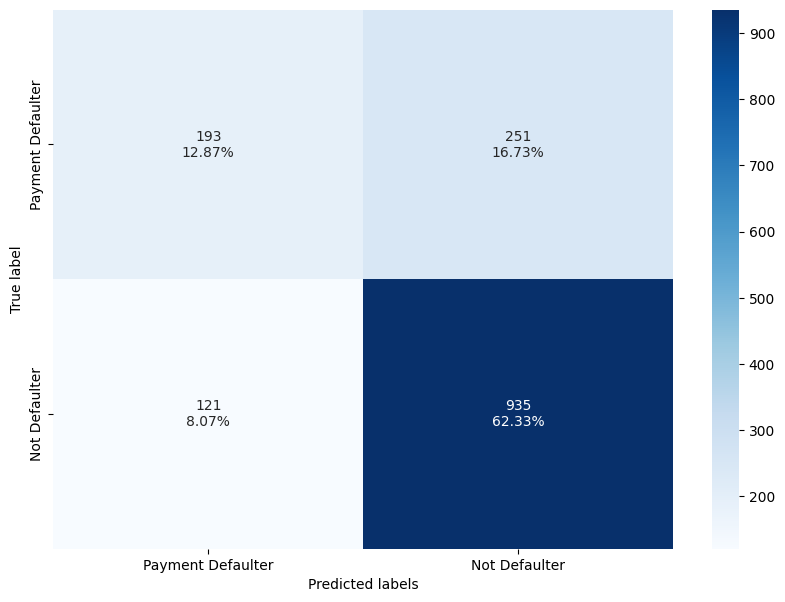

In [ ]:
# it is used beacuse it is maximize the value of TP and TN and MInimize the value of FP and FN
pred_test = logreg.predict(X_test)
make_confusion_matrix(y_test,pred_test)

In [ ]:
accuracy_score(y_test,pred_test)

0.752

In [ ]:
recall_score(y_test,pred_test)

0.4346846846846847

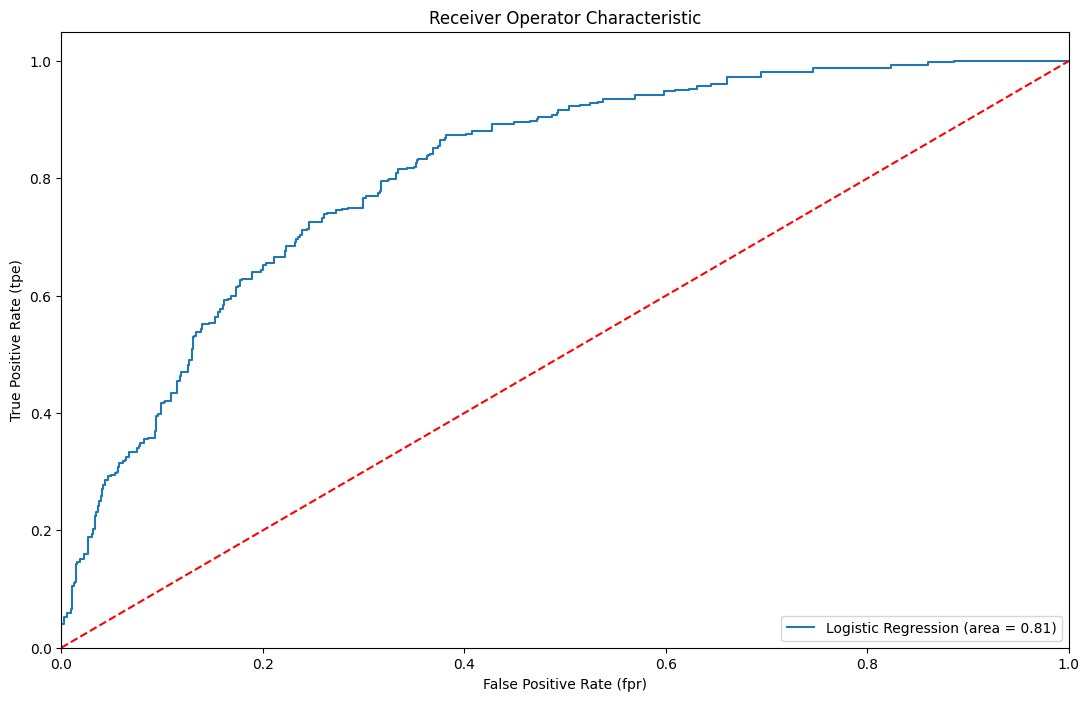

In [ ]:
logit_roc_auc = roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
fpr,tpr,threshold = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpe)')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

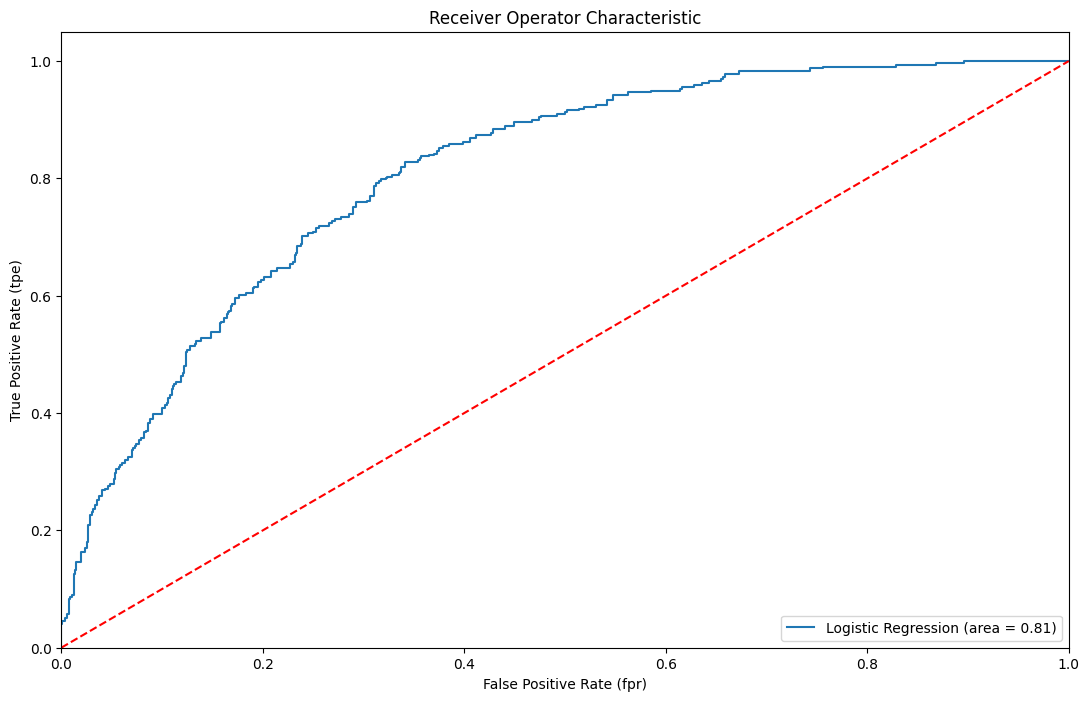

In [ ]:
logit_roc_auc = roc_auc_score(y_train,logreg.predict_proba(X_train)[:,1])
fpr,tpr,threshold = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpe)')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

In [ ]:
train_pred_prob = logreg.predict_proba(X_train)[:,1]
train_pred_prob

array([0.07803711, 0.80367093, 0.0543179 , ..., 0.26700285, 0.41801498,
       0.04338984])

In [ ]:

column_names = ['Cutoff_Prob','TP','FN','TN','FP','P','N'] # probability

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0,1.01,0.01)

for cutoff in Cutoff_Prob:
    y_train['pred_y'] = (train_pred_prob > cutoff).astype('int64')
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 1)).sum() # Conditions
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 0)).sum()

    P = TP + FN
    N = TN + FP

    temp_data = {'Cutoff_Prob': cutoff,
                "TP": TP,
                "FN": FN,
                "TN": TN,
                "FP": FP,
                "P": P,
                "N": N}

    cutoff_data  = cutoff_data.append(temp_data,ignore_index=True)

# Dropping the pred_y colommns from y_train data
y_train.drop('pred_y',axis=1,inplace=True)

<ipython-input-88-e342708dcbc3>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_data  = cutoff_data.append(temp_data,ignore_index=True)
<ipython-input-88-e342708dcbc3>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_data  = cutoff_data.append(temp_data,ignore_index=True)
<ipython-input-88-e342708dcbc3>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_data  = cutoff_data.append(temp_data,ignore_index=True)
<ipython-input-88-e342708dcbc3>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_data  = cutoff_data.append(temp_data,ignore_index=True)
<ipython-input-88-e342708dcbc3>:24: FutureWarning: The frame.app

In [ ]:
cutoff_data['Sn'] = cutoff_data['TP']/cutoff_data['P']
cutoff_data['Sp'] = cutoff_data['TN']/cutoff_data['N']
cutoff_data['Dist'] = ((1-cutoff_data['Sn'])**2 + (1-cutoff_data['Sp'])**2)**0.5
cutoff_data['KS'] = ((cutoff_data['TP']/cutoff_data['P']) - (cutoff_data['FP']/cutoff_data['N'])).abs()
cutoff_data['Re'] =  cutoff_data['TP']/cutoff_data['P']
cutoff_data['Pr'] = cutoff_data['TP']/(cutoff_data['TP'] + cutoff_data['FP'])
cutoff_data['tpr'] = cutoff_data['Re']
cutoff_data['fpr'] = 1 - cutoff_data['Sp']
cutoff_data['f1'] = 2 * (cutoff_data['Pr'] * cutoff_data['Re'])/(cutoff_data['Pr'] + cutoff_data['Re'])



In [ ]:
cutoff_data.head()

,Cutoff_Prob,TP,FN,TN,FP,P,N,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,0.00,1051.0,0.0,0.0,2449.0,1051.0,2449.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.300286,1.000000,1.000000,0.461877
1,0.01,1051.0,0.0,7.0,2442.0,1051.0,2449.0,1.000000,0.002858,0.997142,0.002858,1.000000,0.300887,1.000000,0.997142,0.462588
2,0.02,1051.0,0.0,52.0,2397.0,1051.0,2449.0,1.000000,0.021233,0.978767,0.021233,1.000000,0.304814,1.000000,0.978767,0.467215
3,0.03,1051.0,0.0,140.0,2309.0,1051.0,2449.0,1.000000,0.057166,0.942834,0.057166,1.000000,0.312798,1.000000,0.942834,0.476536
4,0.04,1047.0,4.0,274.0,2175.0,1051.0,2449.0,0.996194,0.111882,0.888126,0.108077,0.996194,0.324953,0.996194,0.888118,0.490054


In [ ]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data['Dist']),'Cutoff_Prob']
ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data['KS']),'Cutoff_Prob']
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data['f1']),'Cutoff_Prob']

In [ ]:
print('The dist cutoff determined is: ',dist_cutoff)
print('The KS cutoff determined is: ',ks_cutoff)
print('The f1 cutoff determined is: ',f1_cutoff)

The dist cutoff determined is:  0.28
The KS cutoff determined is:  0.25
The f1 cutoff determined is:  0.27


In [ ]:
cutoffs = [dist_cutoff,ks_cutoff,f1_cutoff]

for cutoff in cutoffs:
    y_pred_train = (logreg.predict_proba(X_train)[:,1] > cutoff).astype(int)
    y_pred_test = (logreg.predict_proba(X_test)[:,1] > cutoff).astype(int)

    print('Using the cutoff value as : ', cutoff)
    print('Accuracy on train data: ',accuracy_score(y_train,y_pred_train))
    print('Accuracy on test data : ',accuracy_score(y_test,y_pred_test))
    print('Recall on train data: ', recall_score(y_train,y_pred_train))
    print('Recall on test data: ', recall_score(y_test,y_pred_test))
    print('Pression on train data: ',precision_score(y_train,y_pred_train))
    print('Precision on test data: ',precision_score(y_test,y_pred_test))
    print('f1 score on train data: ',f1_score(y_train,y_pred_train))
    print('f1 score on train data: ',f1_score(y_test,y_pred_test))
    print('\n')



Using the cutoff value as :  0.28
Accuracy on train data:  0.7168571428571429
Accuracy on test data :  0.714
Recall on train data:  0.7916270218839201
Recall on test data:  0.795045045045045
Pression on train data:  0.5187032418952618
Precision on test data:  0.5108538350217077
f1 score on train data:  0.6267419962335216
f1 score on train data:  0.6220264317180616


Using the cutoff value as :  0.25
Accuracy on train data:  0.7042857142857143
Accuracy on test data :  0.6966666666666667
Recall on train data:  0.8277830637488106
Recall on test data:  0.8333333333333334
Pression on train data:  0.5046403712296984
Precision on test data:  0.49267643142476697
f1 score on train data:  0.627027027027027
f1 score on train data:  0.6192468619246861


Using the cutoff value as :  0.27
Accuracy on train data:  0.7142857142857143
Accuracy on test data :  0.71
Recall on train data:  0.80209324452902
Recall on test data:  0.8153153153153153
Pression on train data:  0.5155963302752293
Precision on te

Stat model

In [ ]:
Xm = X

In [ ]:
Xm

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,...,Property_A122,Property_A123,Property_A124,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_Worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,1736,3,4,31,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4996,30,3857,4,4,40,1,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
4997,12,804,4,4,38,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
4998,45,1845,4,4,23,1,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm. add_constant (X)


In [ ]:
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


In [ ]:
logmod0 = sm.Logit(y_train,X_train1)
logres0 = logmod0.fit()
print(logres0.summary())

Optimization terminated successfully.
         Current function value: 0.449401
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3451
Method:                           MLE   Df Model:                           48
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.2646
Time:                        20:12:22   Log-Likelihood:                -1572.9
converged:                       True   LL-Null:                       -2138.9
Covariance Type:            nonrobust   LLR p-value:                1.327e-205
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2542      0.573      0.444  

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series ([variance_inflation_factor(X.values, i) for i in range (X. shape[1])],index=X.columns)
print ('Series before feature selection: In\n{}In'. format (vif_series1))

Series before feature selection: In
const                              186.161014
Duration_in_Months                   2.049053
Credit_Amount                        2.550353
Inst_Rt_Income                       1.386317
Current_Address_Yrs                  1.344176
Age                                  1.470061
Num_CC                               1.648534
Dependents                           1.194594
Status_Checking_Acc_A12              1.676926
Status_Checking_Acc_A13              1.241008
Status_Checking_Acc_A14              1.790794
Credit_History_A31                   2.395876
Credit_History_A32                   7.892716
Credit_History_A33                   3.070683
Credit_History_A34                   6.725225
Purposre_Credit_Taken_A41            1.462961
Purposre_Credit_Taken_A410           1.175579
Purposre_Credit_Taken_A42            1.602200
Purposre_Credit_Taken_A43            1.770460
Purposre_Credit_Taken_A44            1.074964
Purposre_Credit_Taken_A45            1.11308

In [ ]:
X_train2 = X_train1.drop('Job_A174', axis=1)
vif_series2 = pd.Series ([variance_inflation_factor(X_train2.values,i) for i in range(X_train2. shape[1])], index=X_train2.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series2))

Series before feature selection: In
const                              152.801644
Duration_in_Months                   2.066755
Credit_Amount                        2.552230
Inst_Rt_Income                       1.367065
Current_Address_Yrs                  1.315573
Age                                  1.450434
Num_CC                               1.640764
Dependents                           1.205744
Status_Checking_Acc_A12              1.656030
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773960
Credit_History_A31                   2.352314
Credit_History_A32                   7.845645
Credit_History_A33                   3.026045
Credit_History_A34                   6.653239
Purposre_Credit_Taken_A41            1.472414
Purposre_Credit_Taken_A410           1.168401
Purposre_Credit_Taken_A42            1.631158
Purposre_Credit_Taken_A43            1.754694
Purposre_Credit_Taken_A44            1.073667
Purposre_Credit_Taken_A45            1.11620

In [ ]:
X_train3 = X_train2.drop('Credit_History_A32', axis=1)
vif_series3 = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train3. shape[1])], index=X_train3.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series3))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train4 = X_train3.drop('Years_At_Present_Employment_A73', axis=1)
vif_series4 = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train4. shape[1])], index=X_train4.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series4))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train5 = X_train4.drop('Years_At_Present_Employment_A74', axis=1)
vif_series5 = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train5. shape[1])], index=X_train5.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series5))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train6 = X_train5.drop('Years_At_Present_Employment_A75', axis=1)
vif_series6 = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train6. shape[1])], index=X_train6.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series6))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train7 = X_train6.drop('Marital_Status_Gender_A92', axis=1)
vif_series7  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train7. shape[1])], index=X_train7.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series7))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train8 = X_train7.drop('Marital_Status_Gender_A93', axis=1)
vif_series8  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train8. shape[1])], index=X_train8.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series8))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train9 = X_train8.drop('Marital_Status_Gender_A94', axis=1)
vif_series9  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train9. shape[1])], index=X_train9.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series9))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train10 = X_train9.drop('Other_Debtors_Guarantors_A102', axis=1)
vif_series10  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train10. shape[1])], index=X_train10.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series10))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train11 = X_train10.drop('Other_Debtors_Guarantors_A103', axis=1)
vif_series11  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train11. shape[1])], index=X_train11.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series11))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train12 = X_train11.drop('Other_Inst_Plans _A142', axis=1)
vif_series12  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train12. shape[1])], index=X_train12.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series12))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train13 = X_train12.drop('Other_Inst_Plans _A143', axis=1)
vif_series13  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train13. shape[1])], index=X_train13.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series13))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train14 = X_train13.drop('Property_A122', axis=1)
vif_series14  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train14. shape[1])], index=X_train14.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series14))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train15 = X_train14.drop('Property_A123', axis=1)
vif_series15  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train15. shape[1])], index=X_train15.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series15))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train16 = X_train15.drop('Property_A124', axis=1)
vif_series16  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train16. shape[1])], index=X_train16.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series16))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train17 = X_train16.drop('Housing_A152', axis=1)
vif_series17  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train17. shape[1])], index=X_train17.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series17))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train18 = X_train17.drop('Housing_A153', axis=1)
vif_series18  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train18. shape[1])], index=X_train18.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series18))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train19 = X_train18.drop('Job_A172', axis=1)
vif_series19  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train19. shape[1])], index=X_train19.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series19))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train20 = X_train19.drop('Job_A173', axis=1)
vif_series20  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train20. shape[1])], index=X_train20.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series20))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train21 = X_train20.drop('Telephone_A192', axis=1)
vif_series21  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train21. shape[1])], index=X_train21.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series21))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
X_train22 = X_train21.drop('Foreign_Worker_A202', axis=1)
vif_series22  = pd.Series ([variance_inflation_factor(X_train3.values,i) for i in range(X_train22. shape[1])], index=X_train22.columns)
print('Series before feature selection: In\n{}\n'. format(vif_series22))

Series before feature selection: In
const                              115.369136
Duration_in_Months                   2.066197
Credit_Amount                        2.532222
Inst_Rt_Income                       1.366998
Current_Address_Yrs                  1.315434
Age                                  1.449840
Num_CC                               1.558144
Dependents                           1.205743
Status_Checking_Acc_A12              1.653181
Status_Checking_Acc_A13              1.234515
Status_Checking_Acc_A14              1.773576
Credit_History_A31                   1.160133
Credit_History_A33                   1.232496
Credit_History_A34                   1.650300
Purposre_Credit_Taken_A41            1.471431
Purposre_Credit_Taken_A410           1.167929
Purposre_Credit_Taken_A42            1.631117
Purposre_Credit_Taken_A43            1.753351
Purposre_Credit_Taken_A44            1.073336
Purposre_Credit_Taken_A45            1.115241
Purposre_Credit_Taken_A46            1.21389

In [ ]:
logmod1 = sm.Logit(y_train,X_train22)
logres1 = logmod1.fit()
print(logres1.summary())

Optimization terminated successfully.
         Current function value: 0.475476
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3472
Method:                           MLE   Df Model:                           27
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.2219
Time:                        20:45:43   Log-Likelihood:                -1664.2
converged:                       True   LL-Null:                       -2138.9
Covariance Type:            nonrobust   LLR p-value:                1.178e-182
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3027      0.300     -4.349  

In [ ]:
X_train23 = X_train22.drop('Dependents', axis=1)
logmod2 = sm.Logit(y_train,X_train23)
logres2 = logmod2.fit()
print(logres2.summary())

Optimization terminated successfully.
         Current function value: 0.475534
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3473
Method:                           MLE   Df Model:                           26
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.2218
Time:                        20:54:37   Log-Likelihood:                -1664.4
converged:                       True   LL-Null:                       -2138.9
Covariance Type:            nonrobust   LLR p-value:                2.351e-183
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.2198      0.270     -4.521  

In [ ]:
X_train24 = X_train23.drop('Current_Address_Yrs', axis=1)
logmod2 = sm.Logit(y_train,X_train24)
logres2 = logmod2.fit()
print(logres2.summary())

Optimization terminated successfully.
         Current function value: 0.475680
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3474
Method:                           MLE   Df Model:                           25
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.2216
Time:                        20:55:41   Log-Likelihood:                -1664.9
converged:                       True   LL-Null:                       -2138.9
Covariance Type:            nonrobust   LLR p-value:                6.223e-184
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.1349      0.256     -4.430  

In [ ]:
X_train25 = X_train24.drop('Purposre_Credit_Taken_A45', axis=1)
logmod2 = sm.Logit(y_train,X_train25)
logres2 = logmod2.fit()
print(logres2.summary())

Optimization terminated successfully.
         Current function value: 0.475898
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3475
Method:                           MLE   Df Model:                           24
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.2213
Time:                        20:56:53   Log-Likelihood:                -1665.6
converged:                       True   LL-Null:                       -2138.9
Covariance Type:            nonrobust   LLR p-value:                2.059e-184
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.1378      0.256     -4.445  

In [ ]:
X_train26 = X_train25.drop('Purposre_Credit_Taken_A44', axis=1)
logmod2 = sm.Logit(y_train,X_train26)
logres2 = logmod2.fit()
print(logres2.summary())

Optimization terminated successfully.
         Current function value: 0.476126
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3476
Method:                           MLE   Df Model:                           23
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.2209
Time:                        20:57:22   Log-Likelihood:                -1666.4
converged:                       True   LL-Null:                       -2138.9
Covariance Type:            nonrobust   LLR p-value:                6.936e-185
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.1654      0.255     -4.571  

In [ ]:
X_train27 = X_train26.drop('Savings_Acc_A63', axis=1)
logmod2 = sm.Logit(y_train,X_train27)
logres2 = logmod2.fit()
print(logres2.summary())

Optimization terminated successfully.
         Current function value: 0.476412
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3477
Method:                           MLE   Df Model:                           22
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.2204
Time:                        20:58:16   Log-Likelihood:                -1667.4
converged:                       True   LL-Null:                       -2138.9
Covariance Type:            nonrobust   LLR p-value:                2.784e-185
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.1880      0.254     -4.677  

In [ ]:
pred_train1 = logres2.predict(X_train27)
#make_confusion_matrix(y_train,pred_train1)
pred_train1

717     0.110242
2496    0.788110
2469    0.088178
1375    0.871590
2742    0.054297
          ...   
4307    0.388625
2550    0.052976
537     0.186885
1220    0.399033
4271    0.036644
Length: 3500, dtype: float64

In [ ]:
y_pred_train1 = np.where(pred_train1 > 0.5,1,0)
y_pred_train1.shape

(3500,)

In [ ]:
accuracy_score (y_train,y_pred_train1)

0.7634285714285715

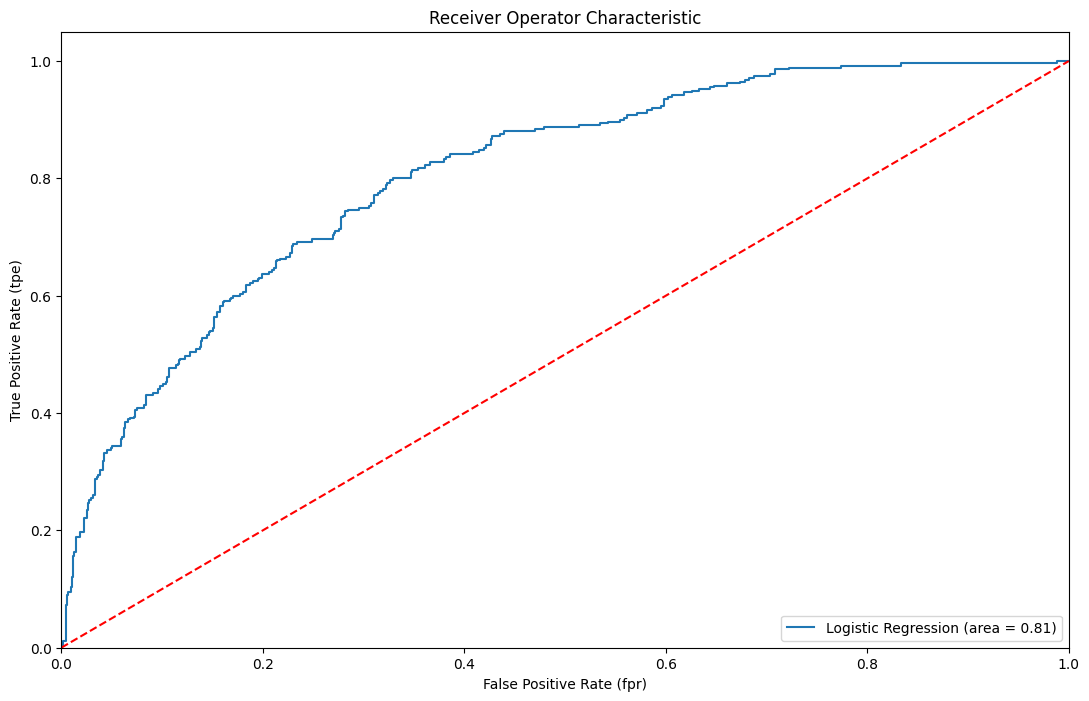

In [ ]:

logit_roc_auc = roc_auc_score(y_train,pred_train1)
fpr,tpr,threshold = roc_curve(y_train,pred_train1)
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpe)')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()


In [ ]:
logit_roc_auc

0.8066443166573358

In [ ]:
confusion_matrix(y_train,y_pred_train1)

array([[2191,  258],
       [ 570,  481]])

<Axes: >

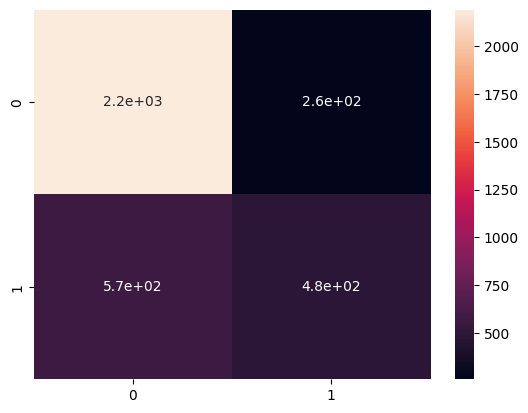

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_pred_train1),annot=True)

In [ ]:
print('Accuracy on train data: ',accuracy_score(y_train,y_pred_train1))
print('Recall on train data: ', recall_score(y_train,y_pred_train1))
print('Pression on train data: ',precision_score(y_train,y_pred_train1))
print('f1 score on train data: ',f1_score(y_train,y_pred_train1))

Accuracy on train data:  0.7634285714285715
Recall on train data:  0.4576593720266413
Pression on train data:  0.6508795669824087
f1 score on train data:  0.5374301675977654
